In [1]:
import numpy as np
import xgboost as xgb
from sklearn.datasets import fetch_california_housing

# Fetch dataset using sklearn
data = fetch_california_housing()
print( data.DESCR)
X = data.data
y = data.target

num_round = 500

param = {
    "eta": 0.05,
    "max_depth": 10,
    "tree_method": "gpu_hist",
}

# GPU accelerated training
dtrain = xgb.DMatrix(X, label=y, feature_names=data.feature_names)
%time model = xgb.train(param, dtrain,num_round)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [2]:
%%time
# Compute shap values using GPU with xgboost
# model.set_param({"predictor":"cpu_predictor"})
model.set_param({"predictor": "gpu_predictor"})
shap_values = model.predict(dtrain, pred_contribs=True)

Wall time: 3.73 s


In [3]:
%%time
# Compute shap interaction values using GPU
shap_interaction_values = model.predict(dtrain, pred_interactions=True)

Wall time: 49.3 s


Wall time: 3.69 s


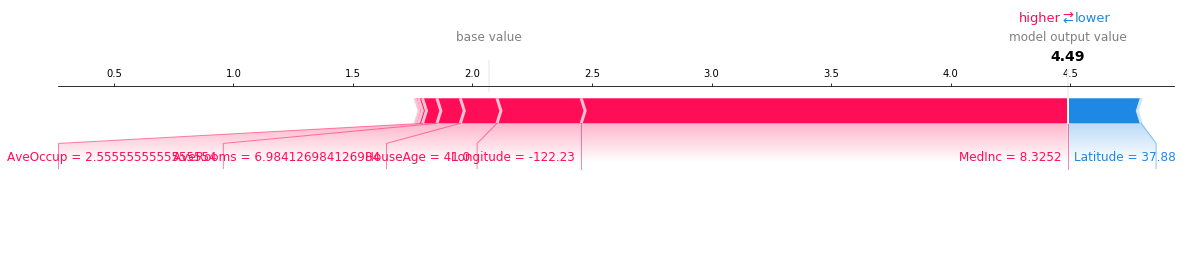

In [6]:
# We can use the shap package
import shap


# shap will call the GPU accelerated version as long as the predictor parameter is set to "gpu_predictor"
model.set_param({"predictor": "gpu_predictor"})
explainer = shap.TreeExplainer(model)
%time shap_values = explainer.shap_values(X)

# visualize the first prediction's explanation
shap.force_plot(
    explainer.expected_value,
    shap_values[0, :],
    X[0, :],
    feature_names=data.feature_names,
    matplotlib=True
)

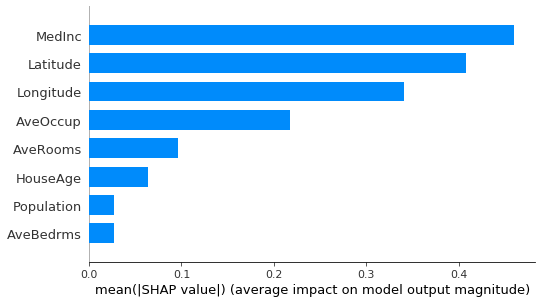

In [5]:
# Show a summary of feature importance
shap.summary_plot(shap_values, X, plot_type="bar", feature_names=data.feature_names)